# Demo to run ECmean4 functions within the AQUA framework

We load the AQUA module

In [1]:
import sys
# sys.path.append("/users/sughosh/AQUA")
from aqua import Reader
import xarray as xr

Start loading the ecmean functions, define the years of the experiments and experiment name. We define both atmospheric and oceanic models, as well initial and final years and the name of the configuration file. 

In [3]:
from ecmean.global_mean import global_mean
from ecmean.performance_indices import performance_indices
from wand.image import Image as WImage # to open PDFs in jupyter

model_atm = 'IFS'
model_oce = 'FESOM'
exp = 'tco79-orca1'
year1 = 2001
year2 = 2002
numproc = 1
interface = '../config/interface_AQUA.yml'
config = '../config/ecmean_config_replicability.yml'

Call the reader for the atmospheric and oceanic components. Currently separated to avoid conflicts between variables with same name. For safety, we remove sea ice from atmospheric dataset.

In [4]:
clim=xr.open_mfdataset("/pfs/lustrep3/scratch/project_465000454/kkeller/AQUA/diagnostics/ecmean/ECmean4/ecmean/climatology/EC23/r360x180/*")
clim= clim.isel(time=0).squeeze().ta

In [5]:
# reader_atm2d = Reader(model="IFS", exp="tco79-eORCA2", source="atm2d", areas=False)
# data_atm2d = reader_atm2d.retrieve(fix=True)
# reader_atm3d = Reader(model="IFS", exp="tco79-eORCA2", source="atm3d", areas=False)
# data_atm3d = reader_atm3d.retrieve(fix=True)

data_path= "/scratch/project_465000454/sughosh/replicability_data"

data_atm2d = xr.open_mfdataset(data_path+"/atm_2d.nc")
data_atm3d = xr.open_mfdataset(data_path+"/atm_3d.nc")

data = data_atm3d.merge(data_atm2d)

data["2t"].attrs["units"]=data["2t"].attrs["GRIB_units"]
data["msl"].attrs["units"]=data["msl"].attrs["GRIB_units"]
data["tprate"].attrs["units"]=data["tprate"].attrs["GRIB_units"]
data["t"].attrs["units"]=data["t"].attrs["GRIB_units"]
data["u"].attrs["units"]=data["u"].attrs["GRIB_units"]
data["v"].attrs["units"]=data["v"].attrs["GRIB_units"]
data["q"].attrs["units"]=data["q"].attrs["GRIB_units"]

data= data.rename({"height":"plev"})
data = data.interp_like(clim)

In [6]:
data

<xarray.Dataset>
Dimensions:  (time: 360, lon: 360, plev: 19, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 1990-02-01 1990-03-01 ... 2020-01-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    t        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    u        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    v        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    q        (time, plev, lat, lon) float64 dask.array<chunksize=(360, 19, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    2t       (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

2023-09-04 18:49:25 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...


Welcome to ECmean4 v0.1.4: Running global_mean!


2023-09-04 18:49:25 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!
2023-09-04 18:49:25 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-09-04 18:49:25 | ecmean.libs.support |  WARNING -> No mask available for oceanic vars, this might lead to inconsistent results...


Average: psl ALL Global 1011.7482369725536
Average: tas ALL Global 12.344096096692795
Average: pr ALL Global 2.592007137933205


2023-09-04 18:49:30 | ecmean |  WARNING -> Analysis done in 4.2848 seconds
2023-09-04 18:49:32 | ecmean |  WARNING -> Postproc done in 1.9468 seconds


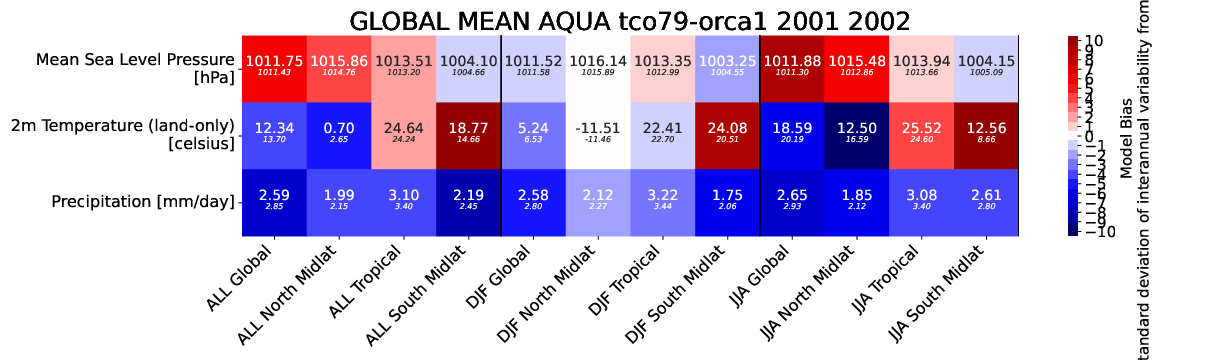

In [7]:
global_mean(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)
img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/global_mean_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img

# Performance indices
Basic call to performance indices

2023-09-04 18:49:36 | ecmean.libs.diagnostic |  WARNING -> You asked to use your own xarray dataset/datarray...
2023-09-04 18:49:36 | ecmean.libs.support |  WARNING -> Atmosphere grid is is a lonlat grid!


Welcome to ECmean4 v0.1.4: Running performance_indices!


/opt/conda/lib/python3.10/site-packages/sparse/_coo/indexing.py:492: NumbaPendingDeprecationWarning: The 'old_style' error capturing is deprecated and will be replaced by `new_style` in a future release.
  starts, stops, n_matches = _get_mask_pairs(starts, stops, coords[i], indices[i])
2023-09-04 18:49:41 | ecmean.libs.support |  WARNING -> Oceanic grid is is a lonlat grid!
2023-09-04 18:49:42 | ecmean |  WARNING -> Preproc in 6.2496 seconds
/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL ta 3283.657


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF ta 2459.02


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA ta 2223.857


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL ua 4.726


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF ua 188.034


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA ua 167.155


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL va 2.396


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF va 24.266


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA va 9.184


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global ALL hus 837379.704


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global DJF hus 624146.471


/opt/conda/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


PI for Global JJA hus 765996.911
PI for Global ALL psl 3.966
PI for Global DJF psl 1.848
PI for Global JJA psl 4.935
PI for Global ALL tas 37.941
PI for Global DJF tas 22.417
PI for Global JJA tas 43.181
PI for Global ALL pr 4.792
PI for Global DJF pr 2.315
PI for Global JJA pr 39.315


2023-09-04 18:54:54 | ecmean |  WARNING -> Done in 311.3376 seconds with 1 processors
2023-09-04 18:54:55 | ecmean |  WARNING -> Postproc done in 1.3345 seconds


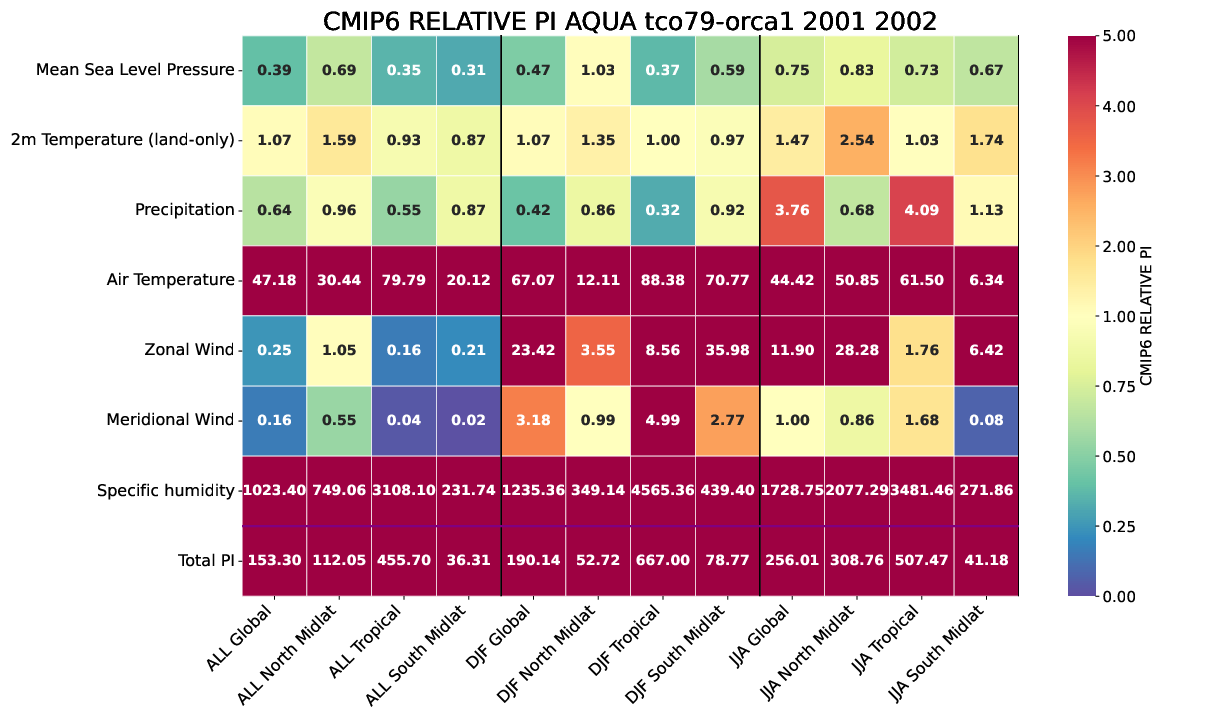

In [8]:
performance_indices(exp, year1, year2, numproc = numproc, config = config, 
            interface = interface, loglevel = 'warning', xdataset = data)

img = WImage(filename=f'/pfs/lustrep3/scratch/project_465000454/AQUA-workflow/ecmean/figures/PI4_EC23_{exp}_AQUA_r1i1p1f1_{year1}_{year2}.pdf')
img